In [10]:
#*** SVM CASE STUDY ***
#We are building an emial spam classifier 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [12]:
# import data into the program
email_rec = pd.read_csv(r"C:\Users\devth\Documents\VScode_files\Machine learning\SVM data\Spam.txt", sep=',', header=None)
email_rec.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1


In [13]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d   
1               0               0.64           0.64             0   
2            0.21               0.28            0.5             0   
3            0.06                  0           0.71             0   
4               0                  0              0             0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet   
1           0.32               0                 0                   0   
2           0.14            0.28              0.21                0.07   
3           1.23            0.19              0.19                0.12   
4           0.63               0              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0  word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(   
1 

In [14]:
# looking at the dimension of the df 
print(email_rec.shape)

(4602, 58)


In [15]:
# ensuring that the data types are correct 
print(email_rec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602 entries, 0 to 4601
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   word_freq_make              4602 non-null   object
 1   word_freq_address           4602 non-null   object
 2   word_freq_all               4602 non-null   object
 3   word_freq_3d                4602 non-null   object
 4   word_freq_our               4602 non-null   object
 5   word_freq_over              4602 non-null   object
 6   word_freq_remove            4602 non-null   object
 7   word_freq_internet          4602 non-null   object
 8   word_freq_order             4602 non-null   object
 9   word_freq_mail              4602 non-null   object
 10  word_freq_receive           4602 non-null   object
 11  word_freq_will              4602 non-null   object
 12  word_freq_people            4602 non-null   object
 13  word_freq_report            4602 non-null   obje

In [16]:
# Convert only object columns to float64
for col in email_rec.select_dtypes(include='object').columns:
    email_rec[col] = pd.to_numeric(email_rec[col], errors='coerce')  # invalid parsing becomes NaN

# Optional: drop rows with NaN if needed
email_rec.dropna(inplace=True)

# Confirm data types
print(email_rec.dtypes)


word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [17]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4601 entries, 1 to 4601
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 non-n

In [18]:
# check if there are no missing values in the dataset 
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [19]:
email_rec['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

*** Data Preparation ***

In [20]:
# splitting into X and Y 

X = email_rec.drop('spam', axis=1) # all the columns except spam
Y =  email_rec.spam.values.astype(int) # only spam

In [21]:
# scaling the features 
# note that the scale function standardises each colomn 
# x=x-mean(x)/std(x)

from sklearn.preprocessing import scale
X = scale(X)


In [22]:
# splitting into train and test data 

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [23]:
# confirming the split has siilar distribution of spam of emails 
print(y_train.mean())
print(y_test.mean())


0.3978260869565217
0.38522809558291093


*** Model Building ***

In [24]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [25]:
# model building 
# instantiate an object of class SVC 
# note that we are using cost C=1

model = SVC(C=1)

# fit 

model.fit(x_train,y_train)

# predict

y_pred = model.predict(x_test)

y_pred


array([0, 1, 0, ..., 1, 0, 1])

In [26]:
# checking the confusion matrix 
from sklearn import metrics

metrics.confusion_matrix(y_test,y_pred)

array([[811,  38],
       [ 61, 471]], dtype=int64)

In [27]:
# printing the other metrix 

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

Accuracy:  0.9283128167994207
Precision:  0.925343811394892
Recall:  0.8853383458646616


In [28]:
# specificity ( % of hams correctly classified ) 

print("Specificity: ", 811/(811+38))

Specificity:  0.9552414605418139


THE SVM WE BUILT HAS GIVEN GOOD RESULTS AN ACCURACY OF 92% 

In [29]:
# INTERPRETATION OF THE RESULTS 
# HYPER PARAMETER TUNING ( FOR GETTING BETTER RESULTS )
# EASIEST WAY TO USE CROSS VALIDATION IS TO USE cross_val_score() function 

# using the KFOLD technique 

# creating kfold object with 5 splits 
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# instantiating a model with cost = 1

model = SVC(C=1)





In [30]:
# Computing the cross validation score
scores = cross_val_score(model, x_train, y_train, cv=folds, scoring='accuracy')
# the accuracies printed are the values after taking each split as the test data 
scores

array([0.91770186, 0.94099379, 0.92080745, 0.93012422, 0.93944099])

In [31]:
# printing the mean accuracy 
print("Mean accuracy: ", scores.mean())

Mean accuracy:  0.9298136645962731


GRID SEARCH TO FIND OPTIMAL HYPERPARAMETER C

In [32]:
# K-fold CV helps us to compute the average metrics over multiple folds, and that is the best indication of the test accuracy we can have.

# but we want to use CV to compute the optimal values of hyperparameters 
# this is done using grid search CV method, which computes metrics such as accuracy, recall etc

# specify the range of parameters as a list 

params = {'C': [0.1, 1, 10, 100, 1000]}
model = SVC()

# set up gridsearch scheme 
# note that we are still using the 5 fold CV scheme we set up earliier 

model_cv = GridSearchCV(estimator = model, param_grid = params, scoring='accuracy', cv= folds, verbose=1, return_train_score=True)



In [33]:
# fit the model - it will fir 5 folds across all values of C 

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

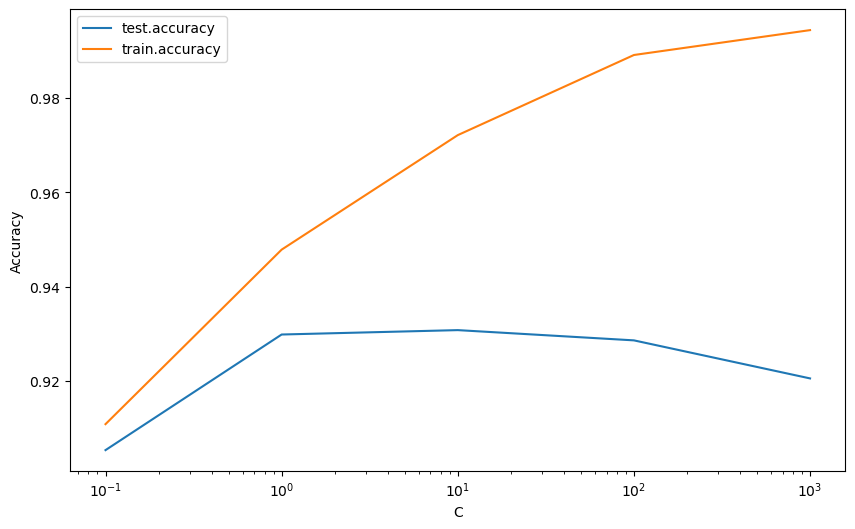

In [34]:
# plotting the c versus train and test scores 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test.accuracy', 'train.accuracy'], loc='upper left')
plt.xscale('log')

In [35]:
# lets finally look at the optimal value of c 

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9307453416149067 at C = 10


In [36]:
# lets now look at the best value of C 

model = SVC(C=best_C)

# fit 

model.fit(x_train, y_train)

# predict 

y_pred = model.predict(x_test)

Accuracy:  0.9304851556842868
Precision:  0.9241245136186771
Recall:  0.8928571428571429


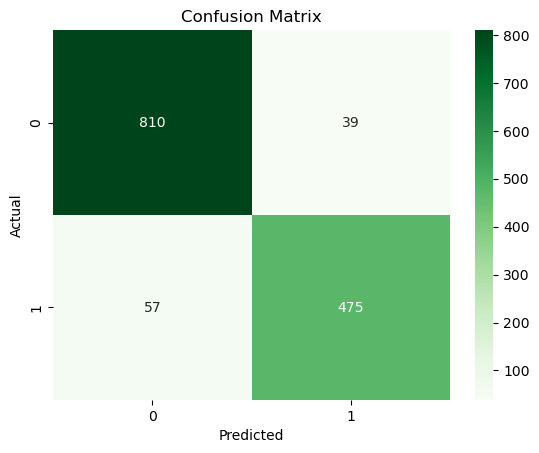

In [37]:
# metrics 

# print other metrics 

# accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# precision
print("Precision: ", metrics.precision_score(y_test, y_pred))
# recall
print("Recall: ", metrics.recall_score(y_test, y_pred))

# printing the confusion matrix
metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# optimization of other evaluation metrics 

params = {'C': [0.1, 1, 10, 100, 1000]}

#specify score metrics in an iterable 
scores = ['accuracy', 'precision', 'recall']

for score in scores: 
    print('# tuning hyper-parameters for {}'.format(score))
          
    # set up gridsearch scheme
    clf = GridSearchCV(SVC(), params, cv=folds, scoring=score, return_train_score=True)
    #fit
    
    clf.fit(x_train, y_train)
    print("the highest {0} is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_['C']))
    print("\n")
    

# tuning hyper-parameters for accuracy
the highest accuracy is 0.9307453416149067 at C = 10


# tuning hyper-parameters for precision
the highest precision is 0.9373311086391073 at C = 0.1


# tuning hyper-parameters for recall
the highest recall is 0.8987270122310326 at C = 10


